#Обработка данных

#Необходимые библиотеки

In [ ]:
import pandas as pd
from scipy import stats
from sklearn.decomposition import PCA
from numpy import *
import matplotlib.pyplot as plt


In [ ]:
col = ['R1','R2','R3','R4','R5','R6','R7','R8',
       'I1','I2','I3','I4','I5','I6','I7','I8',
       'A1','A2','A3','A4','A5','A6','A7','A8',
       'S1','S2','S3','S4','S5','S6','S7','S8',
       'E1','E2','E3','E4','E5','E6','E7','E8',
       'C1','C2','C3','C4','C5','C6','C7','C8',
       'TIPI1','TIPI2','TIPI3','TIPI4','TIPI5',
       'TIPI6','TIPI7','TIPI8','TIPI9','TIPI10']

df = pd.read_csv('/content/drive/MyDrive/data.csv', sep = '\t', usecols=col)

'''All lines without 0. Columns R1 - C8 can be rated 1 to 5, columns TIPI1 - TIPI10 - 1 to 7(so 0 has no useful information)'''
filt_df = df.loc[(df!=0).all(axis = 1)]
filt_df = filt_df.reset_index(drop=True)
filt_df

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
0,3,4,3,1,1,4,1,3,5,5,...,5,4,2,3,2,7,5,6,6,5
1,1,1,2,4,1,2,2,1,5,5,...,5,5,7,4,7,6,6,4,6,1
2,2,1,1,1,1,1,1,1,4,1,...,6,4,3,7,5,1,7,1,5,3
3,3,1,1,2,2,2,2,2,4,1,...,5,2,7,7,5,7,6,2,3,6
4,4,1,1,2,1,1,1,2,5,5,...,6,7,1,7,4,7,7,5,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134043,2,1,1,1,1,1,1,2,2,3,...,3,3,3,5,7,6,7,5,5,4
134044,1,1,1,1,1,1,1,4,4,1,...,7,1,7,1,7,6,6,1,7,1
134045,1,1,1,1,1,1,1,1,1,1,...,6,6,7,4,7,4,7,1,6,4
134046,3,4,4,5,2,4,4,3,3,4,...,6,5,6,5,7,5,7,6,5,5


#Работа со столбцами R1-C8

In [ ]:
dict_of_letters = {'R': ['R1','R2','R3','R4','R5','R6','R7','R8'],
                  'I': ['I1','I2','I3','I4','I5','I6','I7','I8'],
                  'A': ['A1','A2','A3','A4','A5','A6','A7','A8'],
                  'S': ['S1','S2','S3','S4','S5','S6','S7','S8'],
                  'E': ['E1','E2','E3','E4','E5','E6','E7','E8'],
                  'C': ['C1','C2','C3','C4','C5','C6','C7','C8']}

R1_C8_df = filt_df.loc[:, col[:-10]] 

'''Find sum of R1-C8 columns by the same classes'''
for key in dict_of_letters:
    R1_C8_df[key] = filt_df[dict_of_letters[key]].sum(axis = 1)

RIASEC_df = R1_C8_df[['R', 'I', 'A', 'S', 'E', 'C']]
RIASEC_df

,R,I,A,S,E,C
0,20,33,27,37,16,12
1,14,35,19,22,10,10
2,9,11,11,30,24,16
3,15,21,27,20,25,19
4,13,36,34,37,20,26
...,...,...,...,...,...,...
134043,10,19,28,28,20,13
134044,11,18,39,35,24,16
134045,8,8,8,36,12,21
134046,29,29,29,34,16,19


В одной строке может быть несколько максимальных(по сумме) значений. Для этого нужны следующие функции:

In [ ]:
import numpy as np
import collections
import random

def find_all(series: pd.Series)->list:
    """Find all maximums in a line"""
    maximum = series.max()
    return list(series[series.where(series == maximum).notna()].index)

def compare(ser1: pd.Series, ser2: pd.Series)->int:
    """Compare maximums by it's marks"""       
    li = np.unique(np.hstack([ser1.unique(), ser2.unique()]))[::-1]
    list1, list2 = ser1.tolist(), ser2.tolist()
    for num in li:
      if list1.count(num) > list2.count(num):
        return 0
      elif list1.count(num) < list2.count(num):
        return 1
    return 2

def get_max_value(li: list, i: int)->int or str:
  """Returns the true maximum value"""
  viewed = []
  results = []
  for k in range(len(li)):
      for j in range(len(li)):
        if k!=j and [j, k] not in viewed:
            val = compare(filt_df.loc[i][dict_of_letters[li[k]]], filt_df.loc[i][dict_of_letters[li[j]]])
            if val == 0:
              results.append(li[k])
            elif val == 1:
              results.append(li[j])
            viewed.append([k, j])
  if len(results)==0:
    return '0'
  else:
    c = collections.Counter(results)
    item, count = max(c.items(), key=lambda p: p[::-1]) 
    return item

val = 0
max_column = []

for i in range(len(filt_df)):
  li = find_all(RIASEC_df.loc[i])
  if len(li)==1:
    max_column.append(li[0])
  elif len(li)==2:
    val = compare(filt_df.loc[i][dict_of_letters[li[0]]], filt_df.loc[i][dict_of_letters[li[1]]])
    if val == 2:
      max_column.append(li[random.randint(0, len(li) - 1)]) # li[0]
    else:
      max_column.append(li[val])
  elif len(li)>2: 
    val = get_max_value(li, i)
    if val == "0":
      max_column.append('O') #li[0]
    else:
      max_column.append(val)

filt_df['max'] = max_column
RIASEC_df['max'] = max_column
filter_df = filt_df.loc[(filt_df!='O').all(axis=1)]
filter_RIASEC_df = RIASEC_df.loc[(RIASEC_df!='O').all(axis=1)]
filter_RIASEC_df = filter_RIASEC_df.reset_index(drop=True)
filter_RIASEC_df

<ipython-input-6-5dbf5a716d55>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RIASEC_df['max'] = max_column


,R,I,A,S,E,C,max
0,20,33,27,37,16,12,S
1,14,35,19,22,10,10,I
2,9,11,11,30,24,16,S
3,15,21,27,20,25,19,A
4,13,36,34,37,20,26,S
...,...,...,...,...,...,...,...
133261,10,19,28,28,20,13,S
133262,11,18,39,35,24,16,A
133263,8,8,8,36,12,21,S
133264,29,29,29,34,16,19,S


#Работа со столбцами TIPI

In [ ]:
pd.set_option("display.precision", 4)
TIPI_df = filter_df.loc[:, col[48:]]
TIPI_df.describe()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
count,133266.0000,133266.0000,133266.0000,133266.0000,133266.0000,133266.0000,133266.0000,133266.0000,133266.0000,133266.0000
mean,4.7175,3.9305,5.5717,4.0875,5.7734,4.5012,5.6282,3.0900,5.0129,2.8750
std,1.8322,1.8018,1.4473,1.9009,1.2592,1.9229,1.3853,1.8424,1.6064,1.7129
min,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
25%,3.0000,2.0000,5.0000,2.0000,5.0000,3.0000,5.0000,1.0000,4.0000,1.0000
50%,5.0000,4.0000,6.0000,5.0000,6.0000,5.0000,6.0000,3.0000,5.0000,2.0000
75%,6.0000,5.0000,7.0000,6.0000,7.0000,6.0000,7.0000,5.0000,6.0000,4.0000
max,7.0000,7.0000,7.0000,7.0000,7.0000,7.0000,7.0000,7.0000,7.0000,7.0000


Таблицы сопряженности показывают, как связаны данные столбцы

In [ ]:
pd.crosstab(index=TIPI_df["TIPI1"], columns=TIPI_df["TIPI6"])

TIPI6,1,2,3,4,5,6,7
TIPI1,,,,,,,
1,198,122,170,271,835,1860,5348
2,136,258,420,629,2475,4929,4964
3,224,396,823,1121,4005,4439,3219
4,376,493,855,2030,3093,2801,2109
5,1141,2065,3379,3745,8171,5736,3706
6,3582,5836,5648,4781,7861,4150,2382
7,7748,4575,2734,2084,2822,1314,1207


In [ ]:
pd.crosstab(index=TIPI_df["TIPI3"], columns=TIPI_df["TIPI8"])

TIPI8,1,2,3,4,5,6,7
TIPI3,,,,,,,
1,388,145,118,137,332,353,718
2,290,372,383,345,1130,1086,770
3,567,808,969,917,2734,1532,762
4,927,1196,1289,1811,2546,1146,576
5,3175,4438,4593,3529,6479,2324,959
6,10038,11151,6864,4514,7066,2163,900
7,21300,7997,3765,2537,3464,1030,633


In [ ]:
pd.crosstab(index=TIPI_df["TIPI4"], columns=TIPI_df["TIPI9"])

TIPI9,1,2,3,4,5,6,7
TIPI4,,,,,,,
1,195,153,343,584,1305,4687,9046
2,102,328,766,1179,3115,8730,5559
3,96,312,998,1514,3805,5852,2616
4,107,330,1046,2864,3824,4821,2243
5,433,1378,4867,5341,8678,8628,3260
6,683,2217,4420,3380,4439,3383,1193
7,2321,2569,3014,2009,2233,1434,866


In [ ]:
#@title Применение PCA для коррелирующих столбцов
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

pd.set_option("display.precision", 4)

stand = StandardScaler().fit_transform(TIPI_df)
stand_df = pd.DataFrame(stand, columns=['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5',
       'TIPI6','TIPI7','TIPI8','TIPI9','TIPI10'])
norm = preprocessing.normalize(stand_df.values)
norm_df = pd.DataFrame(norm)

X1_6 = stand_df.loc[:, ['TIPI1','TIPI6']].values
X3_8 = stand_df.loc[:, ['TIPI3','TIPI8']].values
X4_9 = stand_df.loc[:, ['TIPI4','TIPI9']].values

pca = PCA(n_components=1)
X1_6PCA = pca.fit_transform(X1_6)
X3_8PCA = pca.fit_transform(X3_8)
X4_9PCA = pca.fit_transform(X4_9)

df_pca = pd.DataFrame(X1_6PCA, columns = ['TIPI1_6'])
df_pca['TIPI3_8'] = X3_8PCA
df_pca['TIPI4_9'] = X4_9PCA
df_pca[['TIPI2', 'TIPI5', 'TIPI7', 'TIPI10']] = stand_df.loc[:, ['TIPI2', 'TIPI5', 'TIPI7', 'TIPI10']]
df_pca.corr()

norm_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,133266.0000,133266.0000,133266.0000,133266.0000,133266.0000,133266.0000,133266.0000,133266.0000,133266.0000,133266.0000
mean,0.0162,0.0011,0.0192,-0.0016,0.0137,0.0035,0.0163,-0.0121,0.0138,-0.0069
std,0.3177,0.3270,0.3007,0.3250,0.3028,0.3248,0.3026,0.3257,0.3104,0.3215
min,-0.8927,-0.9487,-0.9687,-0.8640,-0.9530,-0.8837,-0.9533,-0.8219,-0.8956,-0.8019
25%,-0.2718,-0.3039,-0.1579,-0.3122,-0.2094,-0.2861,-0.1753,-0.3017,-0.2434,-0.2792
50%,0.0641,0.0179,0.1008,0.0888,0.0653,0.0884,0.0917,-0.0233,-0.0023,-0.0947
75%,0.2747,0.2564,0.2684,0.2581,0.2766,0.2720,0.2729,0.2942,0.2584,0.2561
max,0.8698,0.9044,0.7564,0.8674,0.8118,0.8395,0.8013,0.9228,0.8245,0.9591


#Обучение модели 

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score: 0.4048324766442802, f1_macro: 0.20892083393892347, f1_weighted: 0.3446363316348251


'Searching hyperparameters for the model'

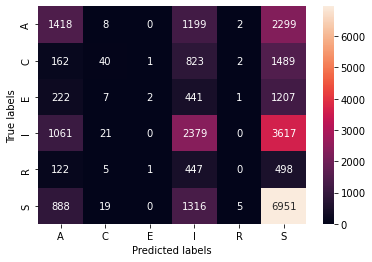

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score, confusion_matrix, balanced_accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import seaborn as sns


n =  int(0.8 * len(df_pca))
X_train = df_pca[:n]
X_test = df_pca[n + 1:]
Y_train = filter_RIASEC_df.loc[:n - 1, ['max']]
Y_test = filter_RIASEC_df.loc[n + 1:, ['max']]
# X_train, X_test, Y_train, Y_test = train_test_split(df_pca, filter_RIASEC_df.loc[:, ['max']], test_size=0.2)

model = XGBClassifier(n_estimators = 180, subsample = 0.6) 
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
accuracy = accuracy_score(Y_test, predicted)
f1_macro = f1_score(Y_test, predicted, average = "macro")
f1_weighted = f1_score(Y_test, predicted, average = "weighted")
print(f"accuracy_score: {accuracy}, f1_macro: {f1_macro}, f1_weighted: {f1_weighted}")

ax= plt.subplot()
cmm = confusion_matrix(Y_test, predicted)
sns.heatmap(cmm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['A', 'C', 'E', 'I', 'R', 'S']) 
ax.yaxis.set_ticklabels(['A', 'C', 'E', 'I', 'R', 'S'])

"""Searching hyperparameters for the model"""
# estimator = XGBClassifier()
# parameters = {
#     'n_estimators': [180],
#     'learning_rate' : [0.1 - i * 0.01 for i in range(10)],
#     'subsample' : [0.6]}

# randomized_search = RandomizedSearchCV(
#     estimator, 
#     param_distributions=parameters, 
#     cv = 3, 
#     n_jobs = -1,
#     scoring = 'accuracy', 
#     n_iter = 10, 
#     verbose = 3
# )

# search = randomized_search.fit(X_train, Y_train)
# search.best_params_